<a href="https://colab.research.google.com/github/DaviFerreira0106/notebooks-inteligenciaArtificial/blob/main/Avalia%C3%A7%C3%A3oDatasetIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova

## Implemente um algoritmo de aprendizado de máquina utilizando uma Máquina de Vetores de Suporte (SVM) para classificar as flores no dataset Iris.

## Importação das bibliotecas

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns


## Carregar o **`DataSet`** Iris

In [22]:
data = sns.load_dataset('iris')
df = pd.DataFrame(data)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Dividindo os dados em treino e teste

In [23]:
X = df.drop('species', axis=1)
y = df['species']

# Divisão dos dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Treinamento do modelo utilizando **`SVM`**

In [24]:
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

## Avaliação do modelo

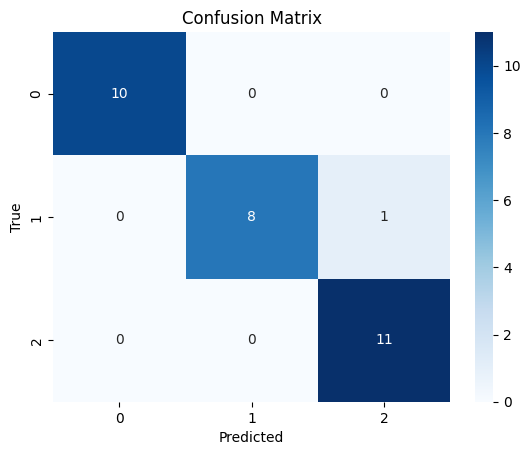

Accuracy: [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [25]:
y_pred = model.predict(X_test_scaled)
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Accuracy: {confusion_matrix}')
print(classification_report(y_test, y_pred))